<a href="https://colab.research.google.com/github/shailymishra/Machine-Learning-Concepts/blob/master/3_Performance_Metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Binary Classification, Multi-class Classification, Regression
2. Which metric to chose
3. Is Accuracy enough to judge a model
4. How do you define evaluation of model?

In [55]:
##### Test data sets to demonstrate evluation metrics

import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier


################################################# Binary Classification y_pred, y_true ######################################################
##### 1) most of the labels in 0 class
X,y = make_classification(n_samples = 1000, n_classes=2,weights=[0.95,0.05], random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train,y_train)
y_pred = dummy.predict(X_test)
y_true = y_test

##### 2) svm classifier 
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(  X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = y_test


################################################# Multi Classification ######################################################


######################################################## Regression  #############################################################


In [2]:
### Performance metric - Self
def calculate_accuracy(y_true,y_pred):
  return np.sum(y_pred == y_true)/len(y_pred) * 100

def calculate_confusion_metric(y_true,y_pred):
  pass

def plot_confusion_metric(y_true,y_pred):
  pass

def calculate_error(y_true,y_pred):
  return np.mean(y_pred != y_true)




In [3]:
####### Self Written Methods

########## 1. Accuracy ################
accuracy = calculate_accuracy(y_true,y_pred)
print(accuracy)


88.0


0.88
0.88
[[12  1]
 [ 2 10]]


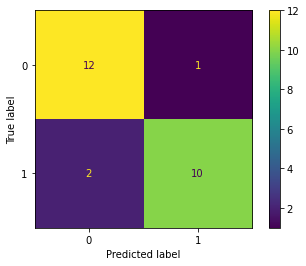

0.9090909090909091
0.8333333333333334
0.8333333333333334
0.761306166786451
[0.         0.07692308 1.        ]
0.8333333333333334
[0.         0.83333333 1.        ]
AUC roc 0.8782051282051283
AUC roc 0.8782051282051283


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


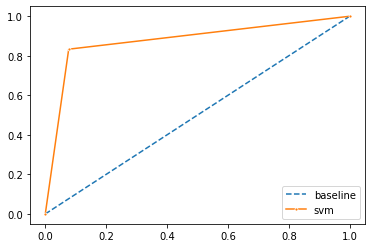

[0.48       0.90909091 1.        ]
[1.         0.83333333 0.        ]
[0 1]
AUC roc 0.9112121212121213


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


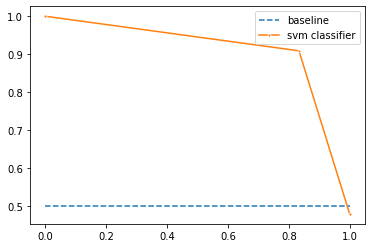

Logloss 4.14468515128649


In [48]:
##### Performance metric - sklearn
##### https://scikit-learn.org/stable/modules/model_evaluation.html
#######################################

#################### BINARY CLASSIFICATION ##########################################

from sklearn import metrics


########## 1. Accuracy ################
from sklearn.metrics import accuracy_score

### Sklearn classifier direct score
accuracy = clf.score(X_test,y_test)
print(accuracy)
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)


########## 2. Confusion Marix ################
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
## plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)     ### plot using classifier as parameter
plt.show()


## Binary Classification
############# 3. Precision ##########################
############# 4. Recall    ##########################
############# 5. F-Score   ##########################
############# 6. Matthews Correlation Coefficient   ##########################


precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1score = metrics.f1_score(y_true, y_pred)
mcc =  metrics.matthews_corrcoef(y_true, y_pred)
print(precision)
print(recall)
print(recall)
print(mcc)

######################################################################################################
####################### 7. ROC Curve #################################
####################### 8. AUC - ROC Curve #################################

falsepositiverate, truepositiverate, threshold = metrics.roc_curve(y_true, y_pred)
print(falsepositiverate)
print(recall)
print(truepositiverate)
### AUC method
auc_roc = metrics.auc(falsepositiverate,truepositiverate)
print('AUC roc', auc_roc)
### direct AUC ROC
auc_roc = metrics.roc_auc_score(y_true,y_pred)
print('AUC roc', auc_roc)

##########################################################
#plot roc curve
#### plotting using sns
#### seaborn's plot returns an axis-object (not a figure). 
import seaborn as sns
plt.figure()
sns.lineplot([0,1],[0,1], linestyle='--', label='baseline')
sns.lineplot(falsepositiverate,truepositiverate,marker='.',label='svm')
# plt.set(xlabel='True Positive Rate', ylabel='False Positive Rate',title='ROC curve')
plt.show()
##########################################################3

##########################################################3
################ comparing against dummy ######################
# falsepositiverate, truepositiverate, threshold = metrics.roc_curve(y_true, dummy.predict(X_test))
# plt = sns.lineplot(falsepositiverate,truepositiverate,marker='.')
##########################################################3


####################### 9. Precision Recall Curve #################################
####################### 10. Precision Recall Curve-AUC #################################
precision, recall, threshold = metrics.precision_recall_curve(y_true, y_pred)
print(precision)
print(recall)
print(threshold)
### AUC method
auc_roc = metrics.auc(recall,precision)
print('AUC roc', auc_roc)
plt.figure()
sns.lineplot([0,1],[0.5,0.5], linestyle='--',label='baseline')
sns.lineplot(recall,precision,marker='.',label='svm classifier')
# plt.set(xlabel='Recall', ylabel='Precision')
plt.show()



####################### 11. Log-Loss #################################
logloss = metrics.log_loss(y_true,y_pred)
print('Logloss',logloss)

Accuracy 0.6666666666666666
[[2 0 0]
 [1 2 1]
 [0 1 2]]


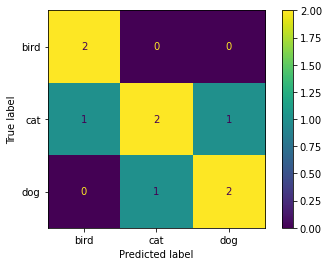

macro precision 0.6666666666666666
macro precision 0.6666666666666666
weighted precision 0.6666666666666666


In [50]:
###############################################################################################
########################### Multi-Class Cliassification #######################################
###############################################################################################

y_true = ["cat","cat","dog","bird","dog","cat","bird","cat","dog"]
y_pred = ["bird","cat","dog","bird","cat","dog","bird","cat","dog"]


from sklearn import metrics


########## 1. Accuracy ################
### Sklearn classifier direct score
accuracy = metrics.accuracy_score(y_true, y_pred)
print('Accuracy',accuracy)

########## 2. Confusion Marix ################
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
## plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,   display_labels=["bird","cat","dog"])
disp.plot()
# plot_confusion_matrix(clf, X_test, y_test)     ### plot using classifier as parameter
plt.show()


## Binary Classification
############# 3. Precision ##########################
############# 4. Recall    ##########################
############# 5. F-Score   ##########################


precision = metrics.precision_score(y_true, y_pred,average="macro")
print('macro precision' , precision)
precision = metrics.precision_score(y_true, y_pred,average="micro")
print('macro precision' , precision)
precision = metrics.precision_score(y_true, y_pred,average="weighted")
print('weighted precision' , precision)

###########################################
############### 6. Multi-class logloss ###############################
#### Image

In [69]:
#################################################################################################
####################################### Regression ##############################################
#################################################################################################

y_true = np.random.rand(20)
y_pred = np.random.rand(20)
# print(y_true)

###################################### 1. R Squared ###########################################
r2score = metrics.r2_score(y_true, y_pred)
print('r2score',r2score)
# Of course, technically, R squared can be negative - say, the model is always predicting an infinitely large number, but if you’re getting a negative R squared, this means something is seriously wrong either with the model, or, perhaps, with the data.

mae = metrics.mean_absolute_error(y_true, y_pred)
print('mae',mae)

mse = metrics.mean_squared_error(y_true, y_pred)
print('mse',mse)

rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
print('rmse',rmse)
### I find that RMSE is a good choice for an evaluation metric, and MAE can be useful in those cases when it is important to downplay the outliers.

rmsle = np.sqrt(metrics.mean_squared_log_error(y_true,y_pred))
print('rmsle',rmsle)

####
# What taking a log here gives us is a measure or relative error. This metric is best to use when targets are having exponential growth, such as population counts, average sales of a commodity over a span of years etc. This metric allows to take the scale of the values into account, e.g. the error of 5 dollars in a 50 dollars purchase is a significant error, whereas the same error of 5 dollars in a 500 000 dollars purchase is much less important.

r2score -1.9661374885190597
mae 0.4012565041216217
mse 0.24549151011334178
rmse 0.4954709982565496
rmsle 0.3438233866525116


Evlauation should always be done with resepect to what we know.
That is what is the prior we have.

For example, if we know that 95% emails are spam, then if you model just can say that a email is spam, and 95% of times it is right.
So in that case accuracy is not the right metric.

Morever what is your object is highly important.
- For spam, our goal is to minimize false positive (classifying important emails as spam)
- For disease, our goal is to minimize false negative (always better to again take test if given positive, rather than declaring the person negative)

![picture](https://github.com/shailymishra/Machine-Learning-Concepts/blob/master/images/performance metric.png?raw=true)

### For more details


https://www.mariakhalusova.com/posts/2019-04-11-ml-model-evaluation-metrics-p1/

https://www.mariakhalusova.com/posts/2019-04-24-ml-model-evaluation-metrics-p3/

https://www.evernote.com/shard/s592/sh/0666f0e7-3aff-0a3e-6096-b8a987336baf/1bfe459a9527ba67fa08eba1779dcf99